# Day 1 part 2: Demonstration of a simple compartmental model with competing hazards

In [1]:
knitr::opts_chunk$set(echo = TRUE)

## 1. Competing hazards

Now that we have our model we can add complexity by examining further compartments and the case of competing hazards. In the next exercise we want to add a mortality compartment, that flows out of I, to describe the probability of death among the infected individuals.

For the next steps, imagine that we have gathered information which suggets that the CFR for the disease we are modelling is 30%. Using that information, and the concepts we have reviewed try to incorporate a new M compartment, specify a mortality rate rate mu and run the model.

Try and fill out the missing gaps in the script below:

Warning message:
"package 'ggplot2' was built under R version 4.3.3"
here() starts at C:/Users/juano/Dropbox/Code/Git/ankara-modelling-2025-notebooks

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


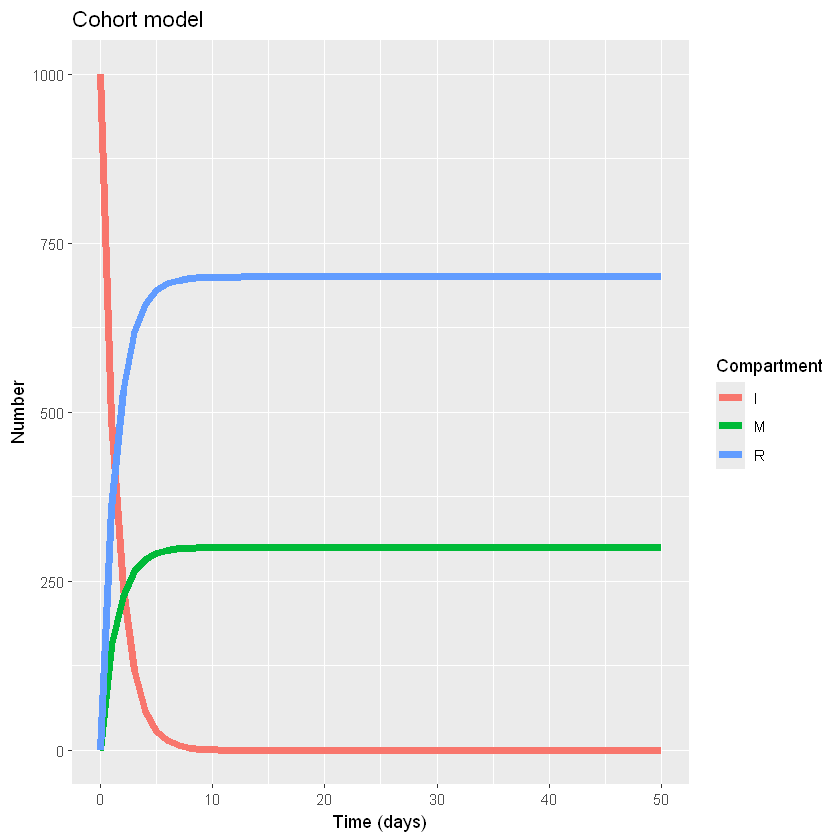

In [2]:
# Load some useful packages:
library(deSolve)  # To solve differential equations 
library(reshape2) # To To manipulate our model output
library(ggplot2)  # To produce nice plots!
library(here)     # To ensure that we always are in our working directory



## Add mortality to our cohort model 

# Population size:
N <- 1000

# MODEL INPUTS:

# Initial conditions
initial_state_values <- c(
  I = N,
  M = 0,
  R = 0)           

# Parameter values per day

# For a CFR of 30% , what is mu? 

mu= 0.5*0.3/(1-0.3) # gamma*CFR/(1-CFR)

parameters <- c(gamma = 1/2, mu)

# TIMESTEPS:

# Vector storing the sequence of timesteps to solve the model at
times <- seq(from = 0, to = 50, by = 1)   # from 0 to 365 days in daily intervals

# MODEL FUNCTION: 

# The model function takes as input arguments (in the following order): time, state and parameters
cohort_model2 <- function(time, state, parameters) {  
  
  with(as.list(c(state, parameters)), {     
    
    # Calculating the total population size N (the sum of the number of people in each compartment)
    N <- I + R
    
    # The differential equations
    dI <- -(gamma+mu) * I     
    dM <- I*mu
    dR <- gamma * I
    
    return(list(c(dI, dM, dR))) 
  })
  
}

# MODEL OUTPUT (solving the differential equations):

# Solving the differential equations using the ode integration algorithm
output2 <- as.data.frame(ode(y = initial_state_values, 
                             times = times, 
                             func = cohort_model2,
                             parms = parameters))


# turn output dataset into long format
output2_long <- melt(as.data.frame(output2), id = "time")                 


# Plot the new output
ggplot(data = output2_long,                                               
       aes(x = time, y = value, colour = variable, group = variable)) +  
  geom_line(size=2) +                                                          
  xlab("Time (days)")+                                                   
  ylab("Number") +                                                       
  labs(colour = "Compartment",                                          
       title = "Cohort model")    

### 2.1 Explore CFR from our simulation

We have our model now with added mortality, try and check if CFR as estimated from the model corresponds to CFR =30%

For that, we might want to see the proportion of people in each compartment

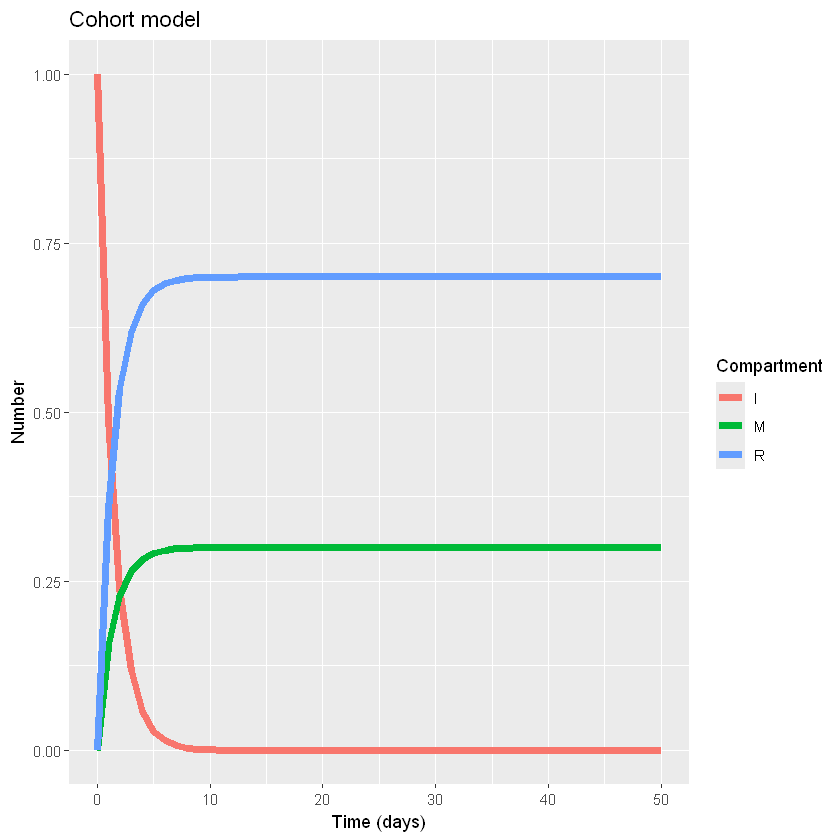

In [3]:


output3_long<- output2_long
output3_long$value<-output2_long$value/N


# Plot the proportion of people in the S, I and R compartments over time
ggplot(data = output3_long,                                               
       aes(x = time, y = value, colour = variable, group = variable)) +  
  geom_line(size=2) +                                                        
  xlab("Time (days)")+                                                  
  ylab("Number") +                                                      
  labs(colour = "Compartment",                                          
       title = "Cohort model")  




Can you tell from the graph what proportion of people have died as a result of the disease?

R/ Around 33%